# Examples/Testing of pyMBE_fancy.py (i.e. multilevel)

Some examples and tests using a model based on the Maxwell-Bloch equations. Use the contents pane on the left to navigate.

## Planned/considered examples (many not done yet:)
* Absorption/dispersion
    * Narrow homogeneous feature
    * Spatially extendded, inhomogeneously broadened medium
    * Multi-$\pi$ pulse propagation
* Photon echo 
    * Usual 2-pulse echo, inhomogeneously broadened
    * Three-pulse echo
    * ROSE protocol
    * AFC
* Hole-burning
    * Narrow hole, optically thick medium
    * (ideally burning back too, but will need to extend the model for this)
* Sub-wavelength:
    * Reflection off sample edge
    * Reflection from resonant features
    * Cavity using atoms
* Cavity
    * Reflection/transmission on empty, resonant cavity
    * Reflection/transmission on empty, off-resonant cavity
    * Change of atom spectrum due to presence of cavity.
    * Hole-burning in a cavity.
    * Optimal $\pi$-pulse in an impedance matched cavity


* Multi-level
    * Multi-peak absorption spectra
    * Branching ratios from single excited state
    * EIT
    * Raman absorption/gain
    
* With 'quantum' noise:
    * Cavity enhanced emission rate
    * RASE
    
   

# Imports 

In [1]:
import sys

from spylind import MBE as mb
from pylab import *
import MT
import numpy as np
from pylab import *
import MT
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
from IPython.display import HTML, display
from matplotlib import rc
from munch import Munch as Bunch

rc('animation', html='html5') #Set animations to display as embedded html5 videos
%matplotlib inline

#### Make a video for absoloutely no reason #####
from matplotlib import animation

def iterdim(a, axis=0):
    """Make an iterator out of a numpy array that iterates over an arbitrary dimension
    
    Returns an iterator.
    """
    a = numpy.asarray(a);
    leading_indices = (slice(None),)*axis
    for i in xrange(a.shape[axis]):
        yield a[leading_indices+(i,)]
        
def make_movie(arr, totalTime=10, tAx=None, titleStr='', frameRate=10, axis=0, xlab="", ylab="", **kwargs):
    """Make an animated movie from a numpy array
    
    returns a matplotlib animation object.
    """
    N=arr.shape[axis]
    numFrames=totalTime*frameRate
    frameInds=linspace(0, N-1, numFrames).astype('i8')
    fig = figure()
    im = imshow(arr.take(0, axis=axis), interpolation="none", cmap="inferno", vmax=arr.max(), vmin=arr.min(), aspect='auto', **kwargs)
    titObj=title(titleStr)
    xlabel(xlab)
    ylabel(ylab)
    

    def update(frNum):
        #print("frmNum: {}".format(frNum))
        indx=frameInds[frNum]
        im.set_array(arr.take(indx, axis=axis))
        if tAx is not None:
            newTitle=titleStr.format(tAx[indx])
        titObj.set_text(newTitle)

    ani = animation.FuncAnimation(fig, func=update, frames=numFrames, 
                           repeat=False, interval=1/frameRate*1000)
    close(fig)
    return ani



def lor(t, width, center=0): 
    return MT.lorentzian(t, [1.,width,center])
def gauss(t, width, center=0):
    return MT.gauss(t, [1., center, width])
def hyp_sec(t, width, center=0):
    return 1./cosh((t-center)/width)#*1.76)
# Automatically reload changed modules, useful when fiddling with the simulation code
%load_ext autoreload
%autoreload 2

# Absorption/Dispersion

## Narrow homogeneous feature

,$|g0>$,$|e0>$
$|g0>$,$\mathtt{\text{0j}}$,$\mathtt{\text{0j}}$
$|e0>$,$\mathtt{\text{0j}}$,$\mathtt{\text{0j}}$


,$|g0>$,$|e0>$
$|g0>$,$0$,$1.0 \overline{Ef}$
$|e0>$,$1.0 Ef$,$0$


,$|g0>$,$|e0>$
$|g0>$,$\mathtt{\text{0j}}$,$\mathtt{\text{0j}}$
$|e0>$,$\mathtt{\text{0j}}$,$\mathtt{\text{(1+0j)}}$


TO↓ | FR →,$|g0>$,$|e0>$
$|g0>$,$0$,$\frac{1.0}{\sqrt{T_{1}}}$
$|e0>$,$0$,$0$


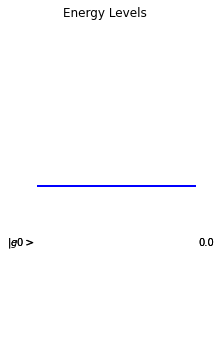

In [10]:
simObj.showSummary()

setInitialState
Setting atom params
Munch({'tSym': t, 'dimSyms': [z, Delta], 'prop_state_syms': [\rho_{0|0}, \rho_{1|1}, \rho_{0|1}], 'stationary_state_syms': [], 'driving_syms': [Ef], 'state_dep_syms': [Delta, E_in]})
state dependent functions should have signature [t, z, Delta, \rho_{0|0}, \rho_{1|1}, \rho_{0|1}, Ef]
{} {Ef: <function MBE_1D_SVEA.setInputs.<locals>.<lambda> at 0x7f8fa6094670>}
Not integrating first step (it's just the initial state)


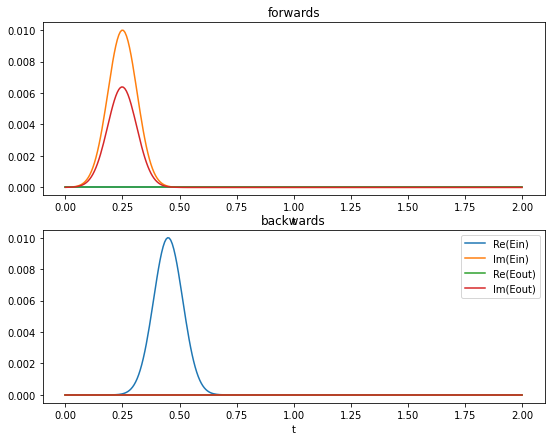

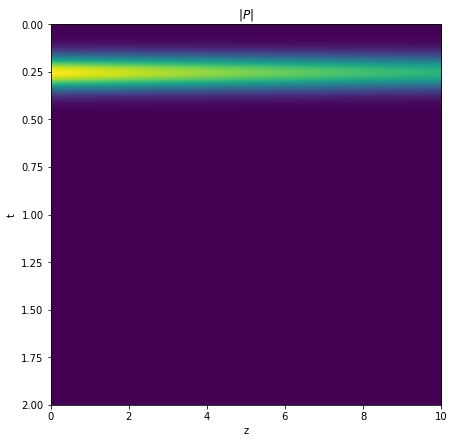

In [2]:
simObj=mb.MBE_1D_SVEA(detAx=array([0,0]), cavityParams={}, length_in_lambdas=10, pts_per_lambda=10)
p=simObj.params
t=linspace(0,1,500)
EinRv=.01*MT.gauss(t, [1,0.45,0.15]) + 0j
EinFw=0.01j*MT.gauss(t, [1,0.25,0.15]) + 0j
#EinFw = lambda t: 0.1 if t<0.5 and t>0.2 else 0
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
#simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
pop0 = [1.0,0.0]#,0.0,0.0]
simObj.setInitialState(pop0=pop0)
lineF=lambda delt: 1*70
simObj.setAtomParams(lineShape=lineF,  gsEnergies=[0], 
                     esEnergies=[0], br_ratio=0.5,T1_opt=0.01/pi/2)#0.003);
simObj.setCavityParams(R1=0.,R2=0.0)
tCalc = linspace(0,2.0,300)
Pout=simObj.calculate(tCalc, 0.1)

mb.showInputsOutputs(simObj.res.fields)
mb.showMeanPol(simObj.res)

setInitialState
Setting atom params
Munch({'tSym': t, 'dimSyms': [z, Delta], 'prop_state_syms': [\rho_{0|0}, \rho_{1|1}, \rho_{0|1}], 'stationary_state_syms': [], 'driving_syms': [Ef], 'state_dep_syms': [E_in, Delta]})
state dependent functions should have signature [t, z, Delta, \rho_{0|0}, \rho_{1|1}, \rho_{0|1}, Ef]
{} {Ef: <function MBE_1D_SVEA.setInputs.<locals>.<lambda> at 0x7f607b500e50>}
Not integrating first step (it's just the initial state)


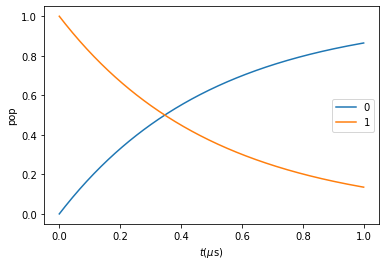

In [3]:
simObj=mb.MBE_1D_SVEA(detAx=array([0,0]), cavityParams={}, length_in_lambdas=10, pts_per_lambda=10)
p=simObj.params
t=linspace(0,1,500)
EinRv=.0*MT.gauss(t, [1,0.45,0.15]) + 0j
EinFw=0.0*MT.gauss(t, [1,0.25,0.15]) + 0j
#EinFw = lambda t: 0.1 if t<0.5 and t>0.2 else 0
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
#simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
pop0 = [0.0,1.0]#,0.0,0.0]
simObj.setInitialState(pop0=pop0)
lineF=lambda delt: 1*70
simObj.setAtomParams(lineShape=lineF,  gsEnergies=[0], 
                     esEnergies=[0], br_ratio=0.5,T1_opt=0.5)#0.003);
simObj.setCavityParams(R1=0.,R2=0.0)
Pout=simObj.calculate(linspace(0,1.0,300), 0.1)
mb.show_pop_vs_t(simObj.res)

setInitialState
Setting atom params
Munch({'tSym': t, 'dimSyms': [z, Delta], 'prop_state_syms': [\rho_{0|0}, \rho_{1|1}, \rho_{0|1}], 'stationary_state_syms': [], 'driving_syms': [Ef], 'state_dep_syms': [E_in, Delta]})
state dependent functions should have signature [t, z, Delta, \rho_{0|0}, \rho_{1|1}, \rho_{0|1}, Ef]
{} {Ef: <function MBE_1D_SVEA.setInputs.<locals>.<lambda> at 0x7f60c87bfd30>}
Not integrating first step (it's just the initial state)


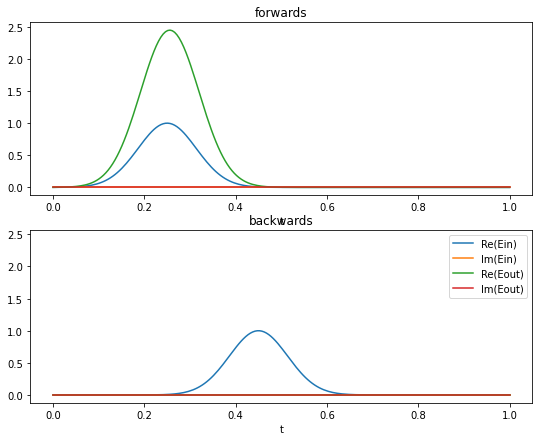

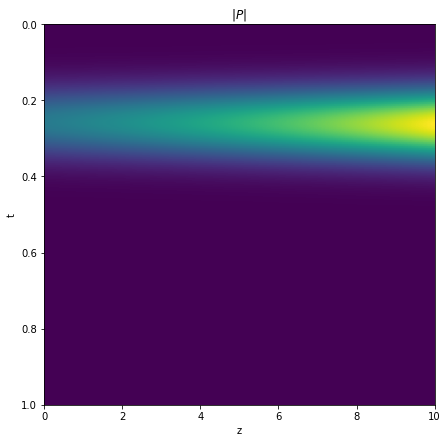

In [4]:
simObj=mb.MBE_1D_SVEA(detAx=array([0,0]), cavityParams={}, length_in_lambdas=10, pts_per_lambda=10)
p=simObj.params
t=linspace(0,1,500)
EinRv=1*MT.gauss(t, [1,0.45,0.15]) + 0j
EinFw=1*MT.gauss(t, [1,0.25,0.15]) + 0j
#EinFw = 1.1*np.ones(t.size)
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
#simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
pop0 = [1.0,0.00]
simObj.setInitialState(pop0=pop0)
lineF=lambda delt: 70
simObj.setAtomParams(lineShape=lineF,  gsEnergies=[0], 
                     esEnergies=[0],T1_opt=0.01/pi)#0.003);
simObj.setCavityParams(R1=0.,R2=0.0)
Pout =simObj.calculate(linspace(0,1.0,200))
mb.showInputsOutputs(simObj.res.fields)
mb.showMeanPol(simObj.res)

In [10]:
s=simObj.ode_s
simObj.params.atoms.smEq

Eq(Matrix([
[           \rho_{0|0}, \rho_{0|1}],
[conjugate(\rho_{0|1}), \rho_{1|1}]]), Matrix([
[                                         -1.0*I*Ef*conjugate(\rho_{0|1}) + 1.0*I*\rho_{0|1}*conjugate(Ef) + 1.0*\rho_{1|1}/T1, 1.0*I*Ef*\rho_{0|0} - 1.0*I*Ef*\rho_{1|1} + \rho_{0|1}*(6.28318530717959*I*Delta - 0.5/T1)],
[-1.0*I*\rho_{0|0}*conjugate(Ef) + 1.0*I*\rho_{1|1}*conjugate(Ef) + (-6.28318530717959*I*Delta - 0.5/T1)*conjugate(\rho_{0|1}),        1.0*I*Ef*conjugate(\rho_{0|1}) - 1.0*I*\rho_{0|1}*conjugate(Ef) - 1.0*\rho_{1|1}/T1]]))

## Inhomogeneously Broadened Medium
Pulse in the forwards direction then in the backwards direction

In [11]:
mb.showInputsOutputs?

Signature: mb.showInputsOutputs(fields, ylm=None, xlm=None)
Docstring: <no docstring>
File:      ~/dev_local/spylind/spylind/MBE.py
Type:      function


In [14]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-10,10,100), length_in_lambdas=2, pts_per_lambda=10)
p=simObj.params
t=linspace(0,1,500)
EinRv = 1*MT.gauss(t, [1,0.45,0.15]) + 0j
EinFw = 1j*MT.gauss(t, [1,0.25,0.15]) + 0j
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialState([1,0])
lineF=lambda delt: 4.0
simObj.setAtomParams(lineShape=lineF, T1_opt=100)#0.003);
Pout=simObj.calculate(linspace(0,3.0,200), 0.01)
mb.showInputsOutputs(simObj.res.fields, xlm=[0.0,0.5])
mb.showMeanPol(simObj.res)
r=simObj.res


Doing cavity mode calcs
setInitialState
Setting atom params


NameError: name 'normaliseSmooth' is not defined

(-20, 20)

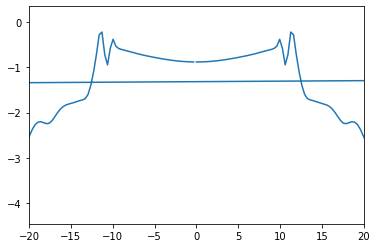

In [205]:
flds = simObj.res.fields
t= flds.t
fax = fftfreq(t.size, t[1]-t[0])
Yin = fft(flds.EinpFw)
Yout = fft(flds.EoutFw)
plot(fax, log10(abs((Yout-0*Yin)/Yin)**2) )
xlim([-20,20])


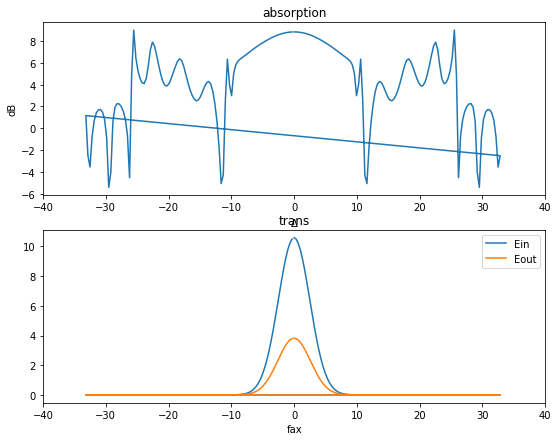

In [211]:
mb.show_absorprtion_spectrum(simObj.res.fields, flm=[-40,40])

In [ ]:
simObj.params.atoms


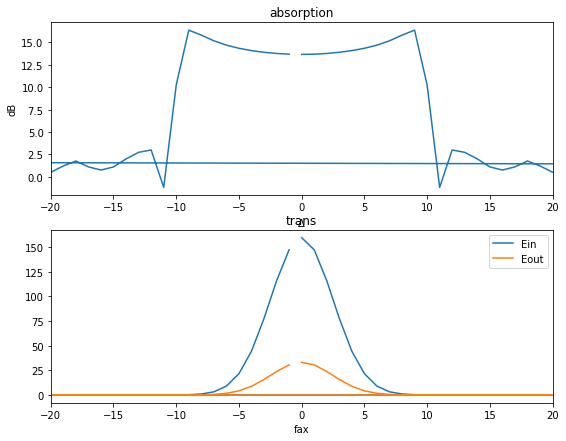

In [135]:
mb.show_absorprtion_spectrum(simObj.res.fields, flm=[-20,20])

### Excitation vs Frequency

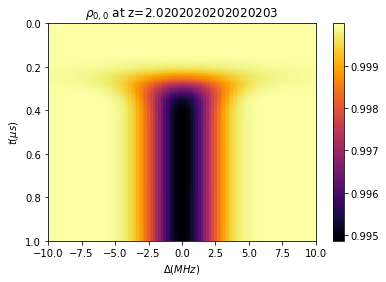

In [32]:
mb.show_pop_delt_vs_t(r, z=2)

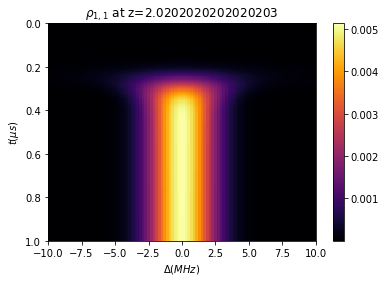

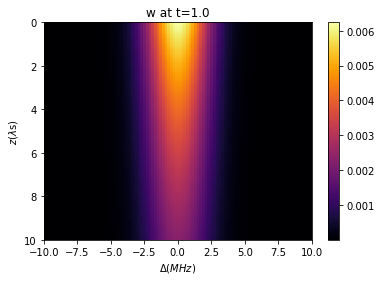

In [33]:
mb.show_pop_delt_vs_t(r, z=2, whichState=1)
mb.show_pop_delt_vs_z(r, t=np.inf, whichState=1)

In [ ]:
ani=make_movie(r.popT[:,0].real, tAx=r.t, axis=0,  xlab="$\Delta$", ylab='z',titleStr='t={:.2f}',extent=[r.det[0], r.det[-1], r.z[-1], r.z[0]])
ani

## Large pulse propagation 

###  $\pi$

Doing cavity mode calcs
setInitialState
Setting atom params
........................................................................................................................................................................................................NUM steps: 2928


AttributeError: Eintern

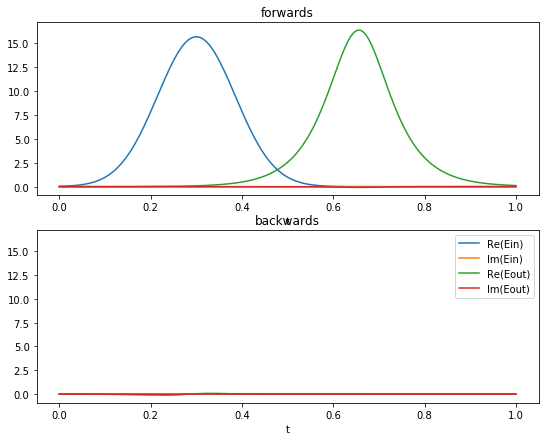

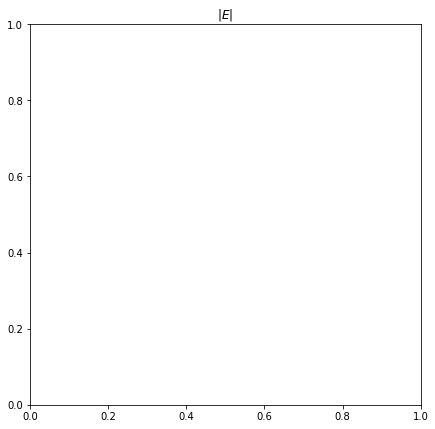

In [19]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-10,10,30), length_in_lambdas=50, pts_per_lambda=5)
p=simObj.params
t=linspace(0,5,1000)
piLength= 0.2
piHeight= pi/piLength
EinFw= piHeight*MT.gauss(t, [1,0.3,piLength])  
EinRv= 0*piHeight*MT.gauss(t, [1,1.5,piLength])  
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialState(pop0=[1,0])
lineF=lambda delt: 15.0
simObj.setAtomParams(lineShape=lineF, T1_opt=100)#0.003);
t_prop=linspace(0,1,200)
Pout=simObj.calculate(t_prop)
r=simObj.res
mb.showInputsOutputs(simObj.res.fields)
mb.showFieldAbs(r)

### $2\pi$ Soliton

........................................................................................................................................................................................................NUM steps: 2746
not implemented: need to think carefully about internal cavity field for multi-level atoms...


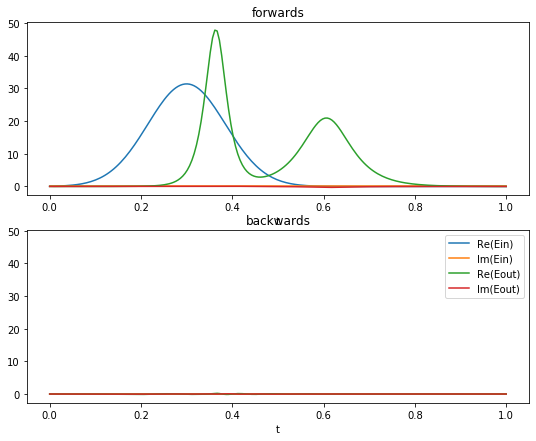

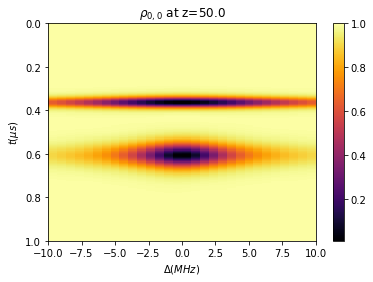

In [24]:
EinFw= 2*piHeight*MT.gauss(t, [1,0.3,piLength])  
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
Pout=simObj.calculate(t_prop)
mb.showInputsOutputs(simObj.res.fields)
mb.showFieldAbs(simObj.res)
mb.show_pop_delt_vs_t(simObj.res)

### $4\pi$  pulse break-up

........................................................................................................................................................................................................NUM steps: 2781
not implemented: need to think carefully about internal cavity field for multi-level atoms...


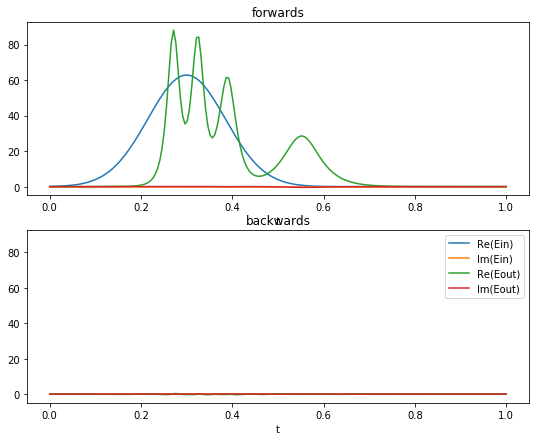

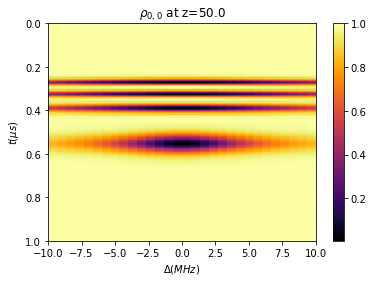

In [25]:
EinFw= 4*piHeight*MT.gauss(t, [1,0.3,piLength])  
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
Pout=simObj.calculate(t_prop)
r=simObj.res
mb.showInputsOutputs(simObj.res.fields)
mb.showFieldAbs(simObj.res)
mb.show_pop_delt_vs_t(r)

In [27]:
# 4pi animation
ani=make_movie(r.popT[:,1].real, tAx=r.t, axis=0, titleStr='t={:.2f}', xlab="$\Delta$", ylab='z', extent=[r.det[0], r.det[-1], r.z[-1], r.z[0]])
display(ani)

# Optical rephasing

## Two-pulse photon echo


Doing cavity mode calcs
setInitialState
Setting atom params
........................................................................................................................................................................................................NUM steps: 3036
not implemented: need to think carefully about internal cavity field for multi-level atoms...


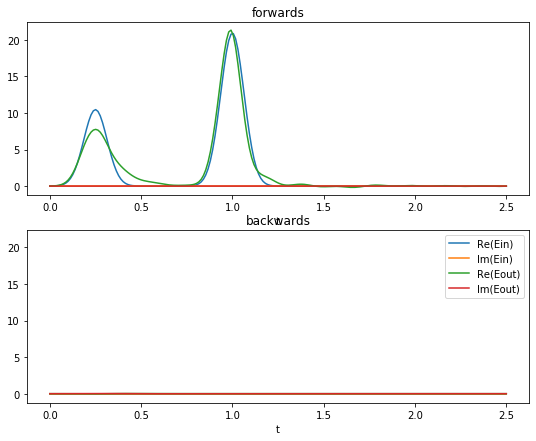

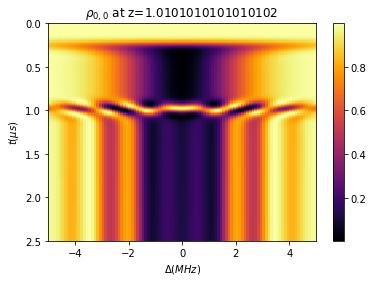

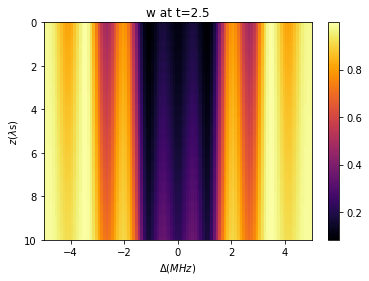

In [31]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-5,5,100), cavityParams={}, length_in_lambdas=10, pts_per_lambda=10)
p=simObj.params
t=linspace(0,2,500)
EinRv= zeros(t.size)
piLength= 0.15
piHeight= pi/piLength
prbLength= 0.15
EinFw= piHeight/2*MT.gauss(t, [1,0.25,prbLength]) + piHeight*MT.gauss(t, [1,1.0,piLength])  
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
#imObj.setInitialConditions(0=0, w0=-1, pop0=1)
simObj.setInitialState([1,0])
lineF=lambda delt: 1.0
simObj.setAtomParams(lineShape=lineF, T1_opt=100)
Pout=simObj.calculate(linspace(0,2.5,200))
r=simObj.res

mb.showInputsOutputs(simObj.res.fields)
mb.showFieldAbs(simObj.res)
mb.show_pop_delt_vs_t(r, z=1)
mb.show_pop_delt_vs_z(r)

##  ROSE

Doing cavity mode calcs
setInitialState
Setting atom params
........................................................................................................................................................................................................NUM steps: 3628
not implemented: need to think carefully about internal cavity field for multi-level atoms...


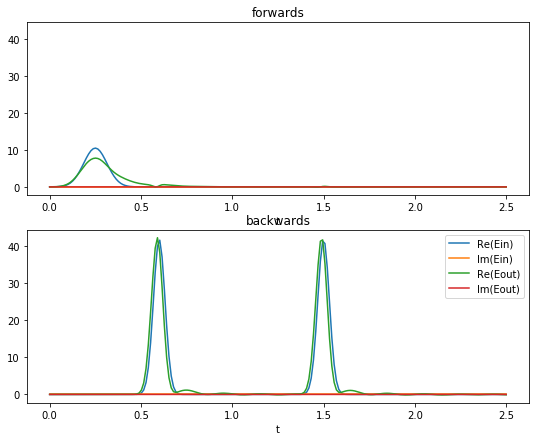

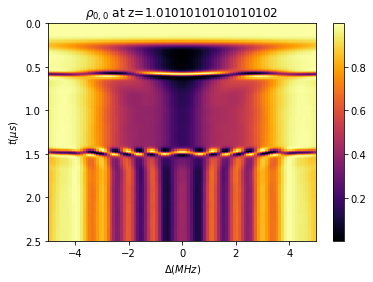

In [60]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-5,5,100), length_in_lambdas=10, pts_per_lambda=10)
p=simObj.params
t=linspace(0,2,500)
piLength= 0.075
piHeight= pi/piLength
prbLength= 0.15
EinFw= pi/prbLength/2*gauss(t, prbLength,0.25) 
EinRv=piHeight*( gauss(t, piLength, 0.6) + gauss(t, piLength, center=1.5) )
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
lineF=lambda delt: 1.0
simObj.setInitialState([1,0])

simObj.setAtomParams(lineShape=lineF, T1_opt=100 )#0.003);
Pout=simObj.calculate(linspace(0,2.5,200))
r=simObj.res

mb.showInputsOutputs(simObj.res.fields)
mb.showFieldAbs(simObj.res)
mb.show_pop_delt_vs_t(r, z=1)

In [34]:
ani=make_movie(r.popT[:,1].real, tAx=r.t, axis=0, titleStr='t={:.2f}', xlab="$\Delta$", ylab='z', extent=[r.det[0], r.det[-1], r.z[-1], r.z[0]])
display(ani)

## AFC
Including both forwards and backwards propagating pulses, simply to show they're independent

Doing cavity mode calcs
setInitialState
Setting atom params
........................................................................................................................................................................................................NUM steps: 1925


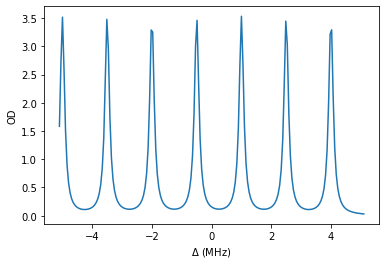

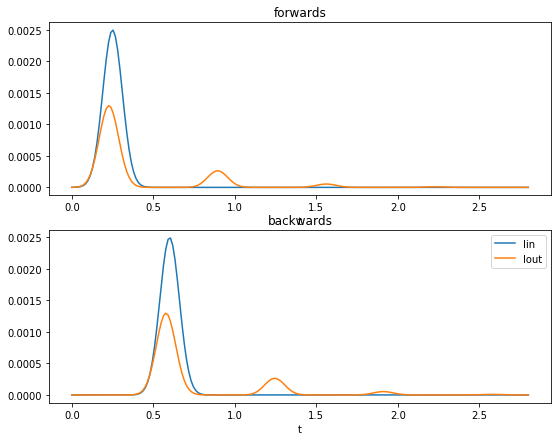

In [61]:

detAx=linspace(-5.1,5.1,200)
simObj=mb.MBE_1D_SVEA(detAx=detAx, length_in_lambdas=10,  pts_per_lambda=5)
p=simObj.params
t=linspace(0,2,500)
EinFw= 0.05*MT.gauss(t, [1,0.25,0.2]) 
EinRv= 0.05*MT.gauss(t, [1,0.6,0.2]) 
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
lineF= 3.5*sum([lor(detAx, width=0.18, center=pos) for pos in arange(-5.0,5.0,1.5)], axis=0)
simObj.setInitialState([1,0])
simObj.setAtomParams(lineShape=lineF, T1_opt=100)
Pout=simObj.calculate(linspace(0,2.8,200))
r=simObj.res
figure()
plot(detAx,lineF)
xlabel('$\Delta$ (MHz)')
ylabel('OD')
mb.showInputsOutputsI(simObj.res.fields)

## 4-level echo
(not finished)
### Absorption/gain due to population starting in different states

Doing cavity mode calcs
setInitialState
Setting atom params
________________________________________________________________________________
[Memory] Calling helper.makeEvolutionFuncsHardWork...
makeEvolutionFuncsHardWork(                        $|g0>$                   $|g1>$  $|e0>$
$|g0>$  (3.141592653589793+0j)                       0j      0j
$|g1>$                      0j  (-3.141592653589793+0j)      0j
$|e0>$                      0j                       0j      0j, 
( Ef,
                        $|g0>$                $|g1>$  \
$|g0>$                     0                     0   
$|g1>$                     0                     0   
$|e0>$  0.741619848709566*Ef  0.632455532033676*Ef   

                                 $|e0>$  
$|g0>$  0.741619848709566*conjugate(Ef)  
$|g1>$  0.632455532033676*conjugate(Ef)  
$|e0>$                                0  ), 
( matrix([[0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j]]),), 
[ matrix([[0, 0

0.0006745002937165457

setInitialState
________________________________________________________________________________
[Memory] Calling helper.makeEvolutionFuncsHardWork...
makeEvolutionFuncsHardWork(                        $|g0>$                   $|g1>$  $|e0>$
$|g0>$  (3.141592653589793+0j)                       0j      0j
$|g1>$                      0j  (-3.141592653589793+0j)      0j
$|e0>$                      0j                       0j      0j, 
( Ef,
                        $|g0>$                $|g1>$  \
$|g0>$                     0                     0   
$|g1>$                     0                     0   
$|e0>$  0.741619848709566*Ef  0.632455532033676*Ef   

                                 $|e0>$  
$|g0>$  0.741619848709566*conjugate(Ef)  
$|g1>$  0.632455532033676*conjugate(Ef)  
$|e0>$                                0  ), 
( matrix([[0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j]]),), 
[ matrix([[0, 0, 0.741619848709566/sqrt(T1)],
        [0, 0

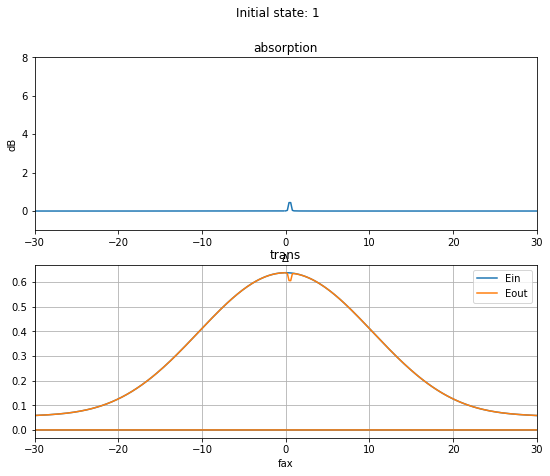

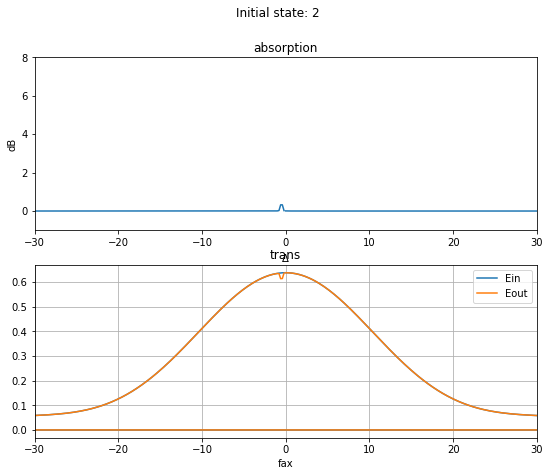

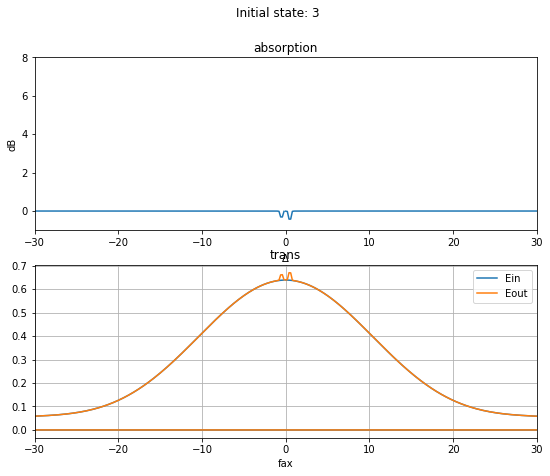

In [63]:
st="""0.55 0.38 0.07
0.40 0.59 0.01
0.05 0.02 0.93"""

osc=np.array(np.matrix(st).reshape(3,3))#.as_array()

gsEnergies = [-0.5, 0.5]
esEnergies = [-0]

simObj=mb.MBE_1D_SVEA(detAx= linspace(-0.2,0.2,20), cavityParams={}, length_in_lambdas=1, pts_per_lambda=2)
p=simObj.params
t=linspace(0,20,1000)
#EinRv=0*MT.gauss(t, [1,0.45,0.3]) + 0j
EinFw= 0.1*MT.gauss(t, [1,.2,0.03])*exp(1j*t*2*pi*-0)
simObj.setInputs(EinFw=EinFw, EinRv=0*EinFw, tAx=t)
pop0 = zeros(3, dtype='f8')
pop0[0] = 1.0
simObj.setInitialState(pop0=pop0)
lineF=lambda delt: 0.1
simObj.setAtomParams(lineShape=lineF,  gsEnergies=array(gsEnergies),# -17.3]), 
                     esEnergies=array(esEnergies), osc_strengths=osc,T1_opt=3)#0.003);
simObj.calculate(linspace(0,5,1000), max_step_size=0.01)

#PLOT
resInit=simObj.res
display(abs(simObj.res.fields.EoutFw).mean() )
mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-30,30], ylm=[-1,8])#, ylm=[-1,2],flm=[-25,25])
suptitle("Initial state: 1")
grid()


pop0*=0
pop0[1] = 1.0
simObj.setInitialState(pop0=pop0)
simObj.calculate(linspace(0,5,1000), max_step_size=0.01)
mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-30,30], ylm=[-1,8])#, ylm=[-1,2],flm=[-25,25])
suptitle("Initial state: 2")
grid()

pop0*=0
pop0[2] = 1.0
simObj.setInitialState(pop0=pop0)
simObj.calculate(linspace(0,5,1000), max_step_size=0.01)
mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-30,30], ylm=[-1,8])#, ylm=[-1,2],flm=[-25,25])
suptitle("Initial state: 3")
grid()

# Hole-burning

## Power broadening

Doing cavity mode calcs
setInitialState
Setting atom params
________________________________________________________________________________
[Memory] Calling helper.makeEvolutionFuncsHardWork...
makeEvolutionFuncsHardWork(        $|g0>$                   $|g1>$  $|e0>$
$|g0>$      0j                       0j      0j
$|g1>$      0j  (-6.283185307179586+0j)      0j
$|e0>$      0j                       0j      0j, 
( Ef,
                        $|g0>$                $|g1>$  \
$|g0>$                     0                     0   
$|g1>$                     0                     0   
$|e0>$  0.707106781186548*Ef  0.707106781186548*Ef   

                                 $|e0>$  
$|g0>$  0.707106781186548*conjugate(Ef)  
$|g1>$  0.707106781186548*conjugate(Ef)  
$|e0>$                                0  ), 
( matrix([[0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j]]),), 
[ matrix([[0, 0, 0.707106781186548/sqrt(T1)],
        [0, 0, 0],
        [0, 0,

/home/morgan/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Hole depth')

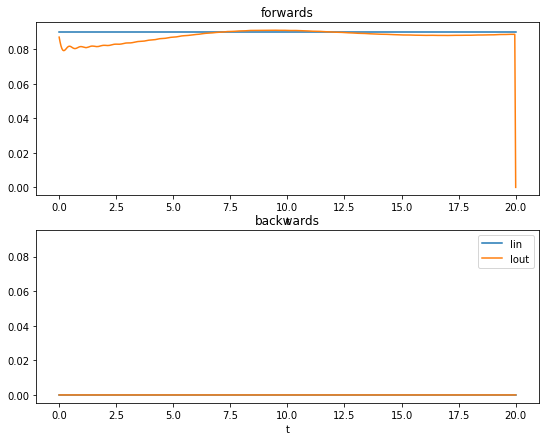

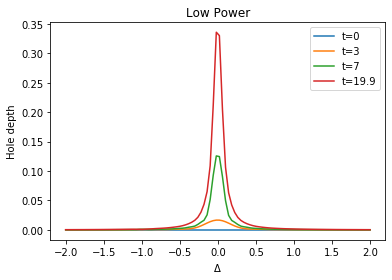

In [74]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-2,2,100), length_in_lambdas=1, pts_per_lambda=10)
p=simObj.params
t=linspace(0,20,1000)
EinRv=zeros(t.size)
EinFw=0.3*ones(t.size)

simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialState([1,0,0])
lineF=lambda delt: 0.2
simObj.setAtomParams(lineShape=lineF, gsEnergies=array([0,1]), 
                     esEnergies=array([0]),osc_strengths=array([[0.5],[0.5]]), T1_opt=10)
Pout=simObj.calculate(linspace(0,20.0,500))
r=simObj.res
#Display
mb.showInputsOutputsI(simObj.res.fields)
figure()
mnPop=r.popT[:,1].mean(axis=1)
for T in [0,3,7,19.9]:
    plot(r.det, mnPop[r.t.searchsorted(T)], label='t={}'.format(T))
legend()
title('Low Power')
xlabel("$\Delta$")
ylabel('Hole depth')

Setting atom params
________________________________________________________________________________
[Memory] Calling helper.makeEvolutionFuncsHardWork...
makeEvolutionFuncsHardWork(        $|g0>$                   $|g1>$  $|e0>$
$|g0>$      0j                       0j      0j
$|g1>$      0j  (-6.283185307179586+0j)      0j
$|e0>$      0j                       0j      0j, 
( Ef,
                        $|g0>$                $|g1>$  \
$|g0>$                     0                     0   
$|g1>$                     0                     0   
$|e0>$  0.707106781186548*Ef  0.707106781186548*Ef   

                                 $|e0>$  
$|g0>$  0.707106781186548*conjugate(Ef)  
$|g1>$  0.707106781186548*conjugate(Ef)  
$|e0>$                                0  ), 
( matrix([[0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j]]),), 
[ matrix([[0, 0, 0.707106781186548/sqrt(T1)],
        [0, 0, 0],
        [0, 0, 0]], dtype=object),
  matrix([[0, 0, 0]

/home/morgan/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Hole depth')

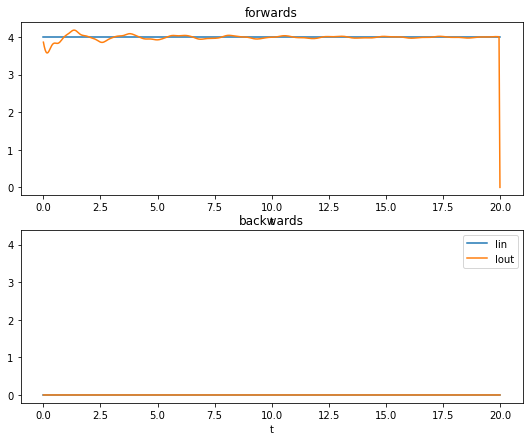

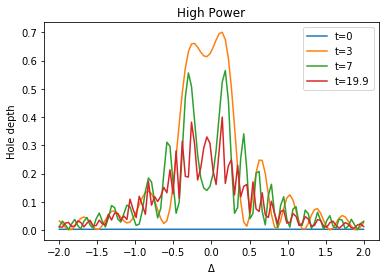

In [75]:
EinFw=2*ones(t.size)
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
lineF=lambda delt: 0.2
simObj.setAtomParams(lineShape=lineF, gsEnergies=array([0,1]), 
                     esEnergies=array([0]),osc_strengths=array([[0.5],[0.5]]), T1_opt=10)
Pout=simObj.calculate(linspace(0,20.0,500))
r=simObj.res
#Display
mb.showInputsOutputsI(simObj.res.fields)
figure()
mnPop=r.popT[:,2].mean(axis=1)
for T in [0,3,7,19.9]:
    plot(r.det, mnPop[r.t.searchsorted(T)], label='t={}'.format(T))
legend()
title('High Power')
xlabel("$\Delta$")
ylabel('Hole depth')

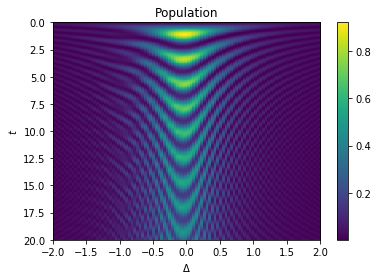

In [76]:
# Image
imshow(mnPop.real, aspect='auto', extent=[r.det[0], r.det[-1], r.t[-1], r.t[0]])
title('Population')
xlabel('$\Delta$')
ylabel('$t$')
colorbar()

## Optically and spatially thick medium

Doing cavity mode calcs
setInitialState
Setting atom params
________________________________________________________________________________
[Memory] Calling helper.makeEvolutionFuncsHardWork...
makeEvolutionFuncsHardWork(        $|g0>$                    $|g1>$  $|e0>$
$|g0>$      0j                        0j      0j
$|g1>$      0j  (-12.566370614359172+0j)      0j
$|e0>$      0j                        0j      0j, 
( Ef,
                        $|g0>$                $|g1>$  \
$|g0>$                     0                     0   
$|g1>$                     0                     0   
$|e0>$  0.707106781186548*Ef  0.707106781186548*Ef   

                                 $|e0>$  
$|g0>$  0.707106781186548*conjugate(Ef)  
$|g1>$  0.707106781186548*conjugate(Ef)  
$|e0>$                                0  ), 
( matrix([[0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j]]),), 
[ matrix([[0, 0, 0.707106781186548/sqrt(T1)],
        [0, 0, 0],
        [0

/home/morgan/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Hole depth')

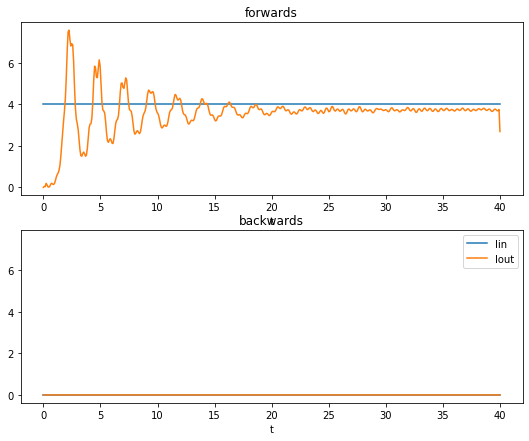

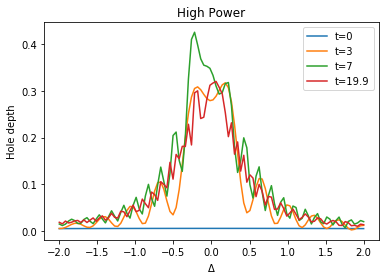

In [81]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-2,2,100), length_in_lambdas=20, pts_per_lambda=10)
p=simObj.params
t=linspace(0,40,1000)
EinRv=zeros(t.size)
EinFw=2*ones(t.size)

simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialState([1,0,0])
lineF=lambda delt: 10.0
simObj.setAtomParams(lineShape=lineF, gsEnergies=array([0,2]), 
                     esEnergies=array([0]),osc_strengths=array([[0.5],[0.5]]), T1_opt=10)

Pout=simObj.calculate(linspace(0,40.0,500))
r=simObj.res
#Display
mb.showInputsOutputsI(simObj.res.fields)
figure()
mnPop=r.popT[:,2].mean(axis=1)
for T in [0,3,7,19.9]:
    plot(r.det, mnPop[r.t.searchsorted(T)], label='t={}'.format(T))
legend()
title('High Power')
xlabel("$\Delta$")
ylabel('Hole depth')

In [84]:
# Hole-depth
ani=make_movie(r.P[:,1].real, tAx=r.t, axis=0, titleStr='t={:.2f}', xlab="$\Delta$", ylab='z', extent=[r.det[0], r.det[-1], r.z[-1], r.z[0]])
display(ani)

In [82]:
# Excitation because it looks cool
ani=make_movie(r.popT[:,2].real, tAx=r.t, axis=0, titleStr='t={:.2f}', xlab="$\Delta$", ylab='z', extent=[r.det[0], r.det[-1], r.z[-1], r.z[0]])
display(ani)

## 3-Pulse Photon Echo

In [ ]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-5,5,100), cavityParams={}, length_in_lambdas=10,  pts_per_lambda=10)
p=simObj.params
t=linspace(0,10,500)
EinRv=zeros(t.size)
EinFw=10*pi/2*( gauss(t, 0.1, 0.35)  + gauss(t, 0.1, 1.0)) + 2*pi/4*gauss(t, 0.25, 4.0)
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
lineF=lambda delt: 2.0
simObj.setAtomParams(lineShape=lineF, T1=None, Taux=1)#0.003);
Pout=simObj.calculate(linspace(0,5.4,200))
r=simObj.res
mb.showInputsOutputs(r.fields)
mb.showInputsOutputs(r.fields, ylm=[-0.4,2.5])

figure()
imshow(r.pop[:].mean(axis=1), aspect='auto')
colorbar()
xlabel('$\Delta$')
ylabel('time')
title('Depth-averaged hole spectrum vs time')
figure()
plot(r.pop[-1].mean(axis=0))
xlabel('$\Delta$')
title('Depth-averaged hole-depth at the end')
#mb.showFieldAbs(r)
#mb.show_w_delt_vs_t(r)
#figure()


In [ ]:
imshow(r.pop[:].mean(axis=1), aspect='auto')
colorbar()
figure()
plot(r.pop[-1].mean(axis=0))

# Cavity

## Emtpy cavity, $R_1= R_2=0.9$
### On-resonance

In [ ]:
simObj=mb.MBE_1D_SVEA(detAx=0, length_in_lambdas=10.0, pts_per_lambda=5)
p=simObj.params
t=linspace(0,3,1000)
EinRv=0.05*gauss(t, 0.3, 0.6)
EinFw=0.00*gauss(t, 0.3, 0.2)
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
lineF=lambda delt: 0.0
simObj.setAtomParams(lineShape=lineF, T1=50)
simObj.setCavityParams(R1=.9,R2=0.9)
Pout=simObj.calculate(linspace(0,3.0,500))
r=simObj.res
mb.showInputsOutputs(r.fields)

sum(abs(r.fields.EoutFw)**2 + abs(r.fields.EoutRv)**2)/sum(abs(r.fields.EinpRv)**2)

### Off-resonant

In [ ]:
# Off-resonant
simObj=mb.MBE_1D_SVEA(detAx=0, length_in_lambdas=10.25, pts_per_lambda=5)
p=simObj.params
t=linspace(0,3,1000)
EinRv=0.05*gauss(t, 0.3, 0.6)
EinFw=0.00*gauss(t, 0.3, 0.2)
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
lineF=lambda delt: 0.0
simObj.setAtomParams(lineShape=lineF, T1=50)
simObj.setCavityParams(R1=.9,R2=0.9)
Pout=simObj.calculate(linspace(0,3.0,500))
r=simObj.res
mb.showInputsOutputs(r.fields)

sum(abs(r.fields.EoutFw)**2 + abs(r.fields.EoutRv)**2)/sum(abs(r.fields.EinpRv)**2)

## Double-pass due to single mirror

In [ ]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-3,3,30), length_in_lambdas=5., pts_per_lambda=10)
p=simObj.params
t=linspace(0,3,1000)
EinRv=zeros(t.size)
EinFw=0.05*gauss(t, 0.5, 0.8)
#EinFw=where(t<0.8, EinFw, 0)
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
lineF=lambda delt: 0.2
simObj.setAtomParams(lineShape=lineF, T1=50)
simObj.setCavityParams(R1=0.0,R2=1.0)
Pout=simObj.calculate(linspace(0,2.0,300))
r=simObj.res
mb.showInputsOutputs(simObj.res.fields)
mb.showMeanPol(simObj.res)
mb.showFieldAbs(simObj.res)

#Total output/input
sum(abs(r.fields.EoutFw)**2 + abs(r.fields.EoutRv)**2)/sum(abs(r.fields.EinpRv)**2 + abs(r.fields.EinpFw)**2)

## Impedance matching
### Check matching

In [ ]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-2.5,2.5,30), length_in_lambdas=5., pts_per_lambda=20)
p=simObj.params
t=linspace(0,3,1000)
EinRv=zeros(t.size)
EinFw=0.05*gauss(t, 0.5, 0.8)
#EinFw=where(t<0.8, EinFw, 0)
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
lineF=lambda delt: 0.2
simObj.setAtomParams(lineShape=lineF, T1=50)
simObj.setCavityParams(R1=0.66,R2=1.0) #Set R1 to the round-trip absorption from above 
Pout=simObj.calculate(linspace(0,2.0,300))
r=simObj.res
mb.showInputsOutputs(simObj.res.fields)
mb.show_w_delt_vs_z(simObj.res)
mb.showFieldAbs(simObj.res)
#Total output/input
sum(abs(r.fields.EoutFw)**2 + abs(r.fields.EoutRv)**2)/sum(abs(r.fields.EinpRv)**2 + abs(r.fields.EinpFw)**2)


### $\pi$-pulse with biggest echo
 


In [ ]:
EinRv=zeros(t.size)
fieldL=[]
for amp in linspace(1.3*pi, 3.0*pi, 30)[:]:
    EinFw=amp/4*gauss(t, 0.25,0.25) + amp*gauss(t, 0.125, 1.35) 
    simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
    Pout=simObj.calculate(linspace(0,2.8,200))
    r=simObj.res
    fieldL.append(r.fields)



In [ ]:
mb.showInputsOutputsI(fieldL[0])
mb.showInputsOutputsI(fieldL[5])
mb.showInputsOutputsI(fieldL[10])
mb.showInputsOutputsI(fieldL[15])

In [ ]:
slc=slice(*r.t.searchsorted([2.1,2.5]))
echHeightL=[max(abs(f.EoutRv[slc])**2)/max(abs(f.EinpFw)**2) for f in fieldL]
plot(echHeightL)

In [ ]:
amp=linspace(1.3*pi, 3.0*pi, 30)[10]
EinFw=0*amp/4*gauss(t, 0.25,0.3) + amp*gauss(t, 0.125, 1.3) 
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
Pout=simObj.calculate(linspace(0,2.8,250))
r=simObj.res
mb.showInputsOutputs(r.fields)
mb.showFieldAbs(r)
mb.show_w_delt_vs_z(r)


In [ ]:
plot(r.w[-1, :,25])
#xlim([400,500])

In [ ]:
plot(r.w[-1, :,25])
xlim([400,475])

# Multi-level hole-burning spectra

## Pr:YSO

In [ ]:
st="""0.55 0.38 0.07
0.40 0.59 0.01
0.05 0.02 0.93"""

osc=np.array(np.matrix(st).reshape(3,3))#.as_array()

gsEnergies = [10.19, 0, -17.3]
esEnergies = [-4.6, 0, 4.84]

simObj=mb.MBE_1D_SVEA(detAx= [0], cavityParams={}, length_in_lambdas=1, pts_per_lambda=2)
p=simObj.params
t=linspace(0,10,1000)
#EinRv=0*MT.gauss(t, [1,0.45,0.3]) + 0j
EinFw= 0.1*MT.gauss(t, [1,.3,0.03])*exp(1j*t*2*pi*-0)
simObj.setInputs(EinFw=EinFw, EinRv=0*EinFw, tAx=t)
pop0 = zeros(6, dtype='f8')
pop0[0] = 1.0
simObj.setInitialState(pop0=pop0)
lineF=lambda delt: 0.1
simObj.setAtomParams(lineShape=lineF,  gsEnergies=array(gsEnergies),# -17.3]), 
                     esEnergies=array(esEnergies), osc_strengths=osc,T1_opt=3)#0.003);
simObj.setFieldCavityParams(R1=0.,R2=0.0)
simObj.calculate(linspace(0,5,1000), max_step_size=0.01)

#PLOT
resInit=simObj.res
display(abs(simObj.res.fields.EoutFw).mean() )
mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-30,30], ylm=[-1,8])#, ylm=[-1,2],flm=[-25,25])
suptitle("Initial state: 1")
grid()


pop0*=0
pop0[1] = 1.0
simObj.setInitialState(pop0=pop0)
simObj.calculate(linspace(0,5,1000), max_step_size=0.01)
mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-30,30], ylm=[-1,8])#, ylm=[-1,2],flm=[-25,25])
suptitle("Initial state: 2")
grid()

pop0*=0
pop0[2] = 1.0
simObj.setInitialState(pop0=pop0)
simObj.calculate(linspace(0,5,1000), max_step_size=0.01)
mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-30,30], ylm=[-1,8])#, ylm=[-1,2],flm=[-25,25])
suptitle("Initial state: 3")
grid()

## Broadband

In [ ]:
st="""0.55 0.38 0.07
0.40 0.59 0.01
0.05 0.02 0.93"""

osc=np.array(np.matrix(st).reshape(3,3))#.as_array()
gsEnergies = [10.19, 0, -17.3]
esEnergies = [-4.6, 0, 4.84]
EinBurn = MT.smooth(where(t<5, 0.2, 0),10)

simObj=mb.MBE_1D_SVEA(detAx= linspace(-50,70,1100), cavityParams={}, length_in_lambdas=1, pts_per_lambda=2)
p=simObj.params
t=linspace(0,10,1000)
#EinRv=0*MT.gauss(t, [1,0.45,0.3]) + 0j
simObj.setInputs(EinFw=EinBurn, EinRv=0*EinBurn, tAx=t)
pop0 = zeros(6, dtype='f8')
pop0[[0,1,2]]=0.33
simObj.setInitialState(pop0=pop0)
lineF=lambda delt: 0.1
simObj.setAtomParams(lineShape=lineF,  gsEnergies=array(gsEnergies),# -17.3]), 
                     esEnergies=array(esEnergies), osc_strengths=osc,T1_opt=2)#0.003);
simObj.setCavityParams(R1=0.,R2=0.0)
_=simObj.calculate(linspace(0,10,1000), max_step_size=0.03)
holedState= Bunch(diag=simObj.res.popT[-1], coh=simObj.res.P[-1]*0)



In [ ]:
#holedState= Bunch(diag=simObj.res.popT[-1], coh=simObj.res.P[-1]*0)
t=linspace(0,3,500)
EinPrb= 0.1*MT.gauss(t, [1,.3,0.03])*exp(1j*t*2*pi*-0)
simObj.setInputs(EinFw=EinPrb, EinRv=0*EinPrb, tAx=t)
simObj.setInitialState(simOutput= holedState)
simObj.calculate(linspace(0,8,1300), max_step_size=0.03)

In [ ]:
mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-40,40], ylm=[0.5,1.85])#, ylm=[-1,2],flm=[-25,25])


## Er:YSO

# Lambda system

## EIT

In [ ]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-0.01,0.01,2), cavityParams={}, length_in_lambdas=1, pts_per_lambda=5)
p=simObj.params
t=linspace(0,100,3000)
EinRv=0*MT.gauss(t, [1,0.45,0.3]) + 0j

#EinFw= where(t<3.,0.2,0)
EinPrb= 2.0*MT.gauss(t, [1,10,0.03])*exp(1j*t*2*pi*0)
EinCtrl = exp(1j*2*pi*-3*t)
EinFw = EinPrb + EinCtrl
#simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
pop0 = [1.0,0.0,0]
simObj.setInitialState(pop0=pop0)
#simObj.setInitialState(simOutput=Bunch(diag=res.pop[-1], coh=res.P[-1]) )
lineF=lambda delt: 1
simObj.setAtomParams(lineShape=lineF,  gsEnergies=array([-3,3]), 
                     esEnergies=[0], osc_strengths=array([[0.5],[0.5]]),T1_opt=0.1)#0.003);
simObj.setCavityParams(R1=0.,R2=0.0)
simObj.setInputs(EinFw=EinCtrl, EinRv=EinRv, tAx=t)
simObj.calculate(linspace(0,100,3000), max_step_size=0.05)
EoutRef = simObj.res.fields.EoutFw.copy()
simObj.setInputs(EinFw=EinCtrl+EinPrb, EinRv=EinRv, tAx=t)
simObj.calculate(linspace(0,100,3000), max_step_size=0.05)
EoutBoth = simObj.res.fields.EoutFw.copy()

display(abs(simObj.res.fields.EoutFw).mean() )
mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-10,10], ylm=[-10,10])#, ylm=[-1,2],flm=[-25,25])


In [ ]:
EoutPrb = EoutBoth-EoutRef
Yout = fft(EoutPrb)
Yin = fft(EinPrb)
fax = fftfreq(t.size, t[1]-t[0])
plot(fax,10*log10(abs(Yout/Yin)**2) )
xlim([-4,5])

## Raman absorption

In [ ]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-.05,0.05,16), cavityParams={}, length_in_lambdas=1, pts_per_lambda=2)
p=simObj.params
t=linspace(0,1000,5000)
EinRv=0*MT.gauss(t, [1,0.45,0.3]) + 0j

#EinFw= where(t<3.,0.2,0)
EinPrb= .1*MT.gauss(t, [1,20,0.03])*exp(1j*t*2*pi*0*t)
EinCtrl = 0.01*exp(1j*2*pi*-1*t)
EinFw = EinPrb# + EinCtrl
EinRv=EinCtrl
#simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
pop0 = [1.0,0.0,0]
simObj.setInitialState(pop0=pop0)
#simObj.setInitialState(simOutput=Bunch(diag=res.pop[-1], coh=res.P[-1]) )
lineF=lambda delt: 0.2
simObj.setAtomParams(lineShape=lineF,  gsEnergies=array([-0.5,0.5]), 
                     esEnergies=[0], osc_strengths=array([[0.5],[0.5]]),T1_opt=15)#0.003);
simObj.setCavityParams(R1=0.,R2=0.0)
if 1:
    simObj.setInputs(EinFw=1*EinCtrl, EinRv=0*EinCtrl, tAx=t)
    simObj.calculate(t, max_step_size=0.01)
    EoutRef = simObj.res.fields.EoutFw.copy()
simObj.res.P=None
simObj.res.pop=None
simObj.setInputs(EinFw=1*EinCtrl+EinPrb, EinRv=0*EinCtrl, tAx=t)
simObj.calculate(t, max_step_size=0.01)
EoutBoth = simObj.res.fields.EoutFw.copy()
simObj.res.P=None
simObj.res.pop=None

In [ ]:
import scipy
scipy.__version__

In [ ]:

#EinPrb= 1.0*MT.gauss(t, [1,10,0.03])*exp(1j*t*2*pi*0*t)
#EinCtrl = 3*exp(1j*2*pi*-5*t)
EoutPrb = EoutBoth-EoutRef
Yout = fft(EoutPrb)
Yin = fft(EinPrb)
fax = fftfreq(t.size, t[1]-t[0])
figure(figsize = [8,7])
plot(fax,-10*log10(abs(Yout/Yin)**2) )
xlim([-2,1])
figure()
plot(fax,-10*log10(abs(Yout/Yin)**2) )
xlim(array([-.01,0.01])+0.3 )
ylim([-0.01,0.3])

In [ ]:
#EinCtrl = 3*exp(1j*2*pi*-5*t)
EoutPrb = EoutBoth-EoutRef
Yout = fft(EoutPrb)
Yin = fft(EinPrb)
fax = fftfreq(t.size, t[1]-t[0])
figure(figsize = [8,7])
plot(fax,-10*log10(abs(Yout/Yin)**2) )
xlim([-2,1])
figure()
plot(fax,-10*log10(abs(Yout/Yin)**2) )
xlim(array([-.01,0.01])+0.3 )
ylim([-0.01,0.3])

In [ ]:
#EinPrb= 1.0*MT.gauss(t, [1,10,0.03])*exp(1j*t*2*pi*0*t)
#EinCtrl = 3*exp(1j*2*pi*-5*t)
EoutPrb = EoutBoth-EoutRef
Yout = fft(EoutPrb)
Yin = fft(EinPrb)
fax = fftfreq(t.size, t[1]-t[0])
figure(figsize = [8,7])
plot(fax,-10*log10(abs(Yout/Yin)**2) )
xlim([-10,10])

In [ ]:
EoutPrb = EoutBoth-EoutRef
Yout = fft(EoutPrb)
Yin = fft(EinPrb)
fax = fftfreq(t.size, t[1]-t[0])
figure(figsize = [8,7])
plot(fax,-10*log10(abs(Yout/Yin)**2) )
xlim([-10,10])

In [ ]:
EoutPrb = EoutBoth-EoutRef
Yout = fft(EoutPrb)
Yin = fft(EinPrb)
fax = fftfreq(t.size, t[1]-t[0])
figure(figsize = [8,7])
plot(fax,-10*log10(abs(Yout/Yin)**2) )
xlim([-10,12])

## ODMR

If I add GS broadening, could do spin echoes?

#  Scratch

In [2]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-0,0,2), cavityParams={}, length_in_lambdas=3, pts_per_lambda=7)
p=simObj.params
t=linspace(0,5,1000)
EinRv=0*MT.gauss(t, [1,0.45,0.15]) + 0j
EinFw=.1*MT.gauss(t, [1,0.1,0.05]) + 0j
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
#simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
pop0 = [0.33,0.33,0.33, 0,0,0]
simObj.setInitialState(pop0=pop0)
lineF=lambda delt: 0.5
simObj.setAtomParams(lineShape=lineF,  gsEnergies=[-17,0,10], 
                     esEnergies=[-7,0,4], br_ratio=0.5,T1_opt=2./pi)#0.003);
simObj.setFieldCavityParams(L=3, R1=0.,R2=0.0)
%time Pout=simObj.calculate(linspace(0,0.1*5.0,500))

#display(abs(simObj.res.fields.EoutFw).mean() )
mb.showInputsOutputs(simObj.res.fields)
mb.showMeanPol(simObj.res)

Doing cavity mode calcs
setInitialState
Setting atom params


AttributeError: 'MBE_1D_SVEA' object has no attribute 'setFieldCavityParams'

In [ ]:
#def normaliseAbsorp(det, od):
def normAbsorp(det, od):
    det2=hstack([ [2*det[0]-det[1]], det, [2*det[-1] -det[-2]] ])
    dif=diff(det2)
    dfSm=interp(arange(0.5, dif.size-0.5, 1), arange(dif.size), dif)
    return od*dfSm

det=linspace(-6,6,21)
od=ones(det.size)
od=MT.gauss(det, [1,0,2])
odNew=normAbsorp(det,od)
plot(det,od*(det[4]-det[3]))
plot(det,odNew)

In [ ]:
detAx=linspace(-5,5,25)
simObj=mb.MBE_1D_SVEA(detAx=detAx, cavityParams={}, length_in_lambdas=10, pts_per_lambda=10)

p=simObj.params
t=linspace(0,1,500)
EinRv=0.1*MT.gauss(t, [1,0.45,0.3]) + 0j
EinFw=0.1*MT.gauss(t, [1,0.25,0.3]) + 0j
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
simObj.setInitialConditions()
lineF=lambda delt: 1
#line= normAbsorp(detAx,lineF(detAx))*detAx.size
line=lineF(detAx)
simObj.setAtomParams(lineShape=line, T1=100, Taux=None, bSmoothSpect=True)#0.003);
simObj.setCavityParams(R1=0.,R2=0.0)
Pout=simObj.calculate(linspace(0,1.0,200))
mb.showInputsOutputsI(simObj.res.fields)
f=simObj.res.fields
sum((abs(f.EoutRv)**2)/sum(abs(f.EinpRv)**2))

In [ ]:
1/e

In [ ]:
MT.downsample?

In [ ]:

def showAbsorptionSpectrum(r, xlm=[-2,2], ylm=[None,None]):
    fax=fftfreq(r.t.size, r.t[1]-r.t[0])
    yout=fft(r.fields.EoutFw)
    yin=fft(r.fields.EinpFw)
    figure()
    subplot(211)
    plot(fax, abs(yout)**2)
    plot(fax, abs(yin)**2)
    xlim(xlm)
    subplot(212)
    plot(fax, abs(yout/yin)**2 )
    plot(fax, 1-0.06*abs(yin)**2)

    xlim(xlm)
    ylim(ylm)
showAbsorptionSpectrum(r)

In [ ]:
import pandas as pd
pd.options.display.float_format = '${:,.3f}$'.format
pd.DataFrame(simObj.excArrs.M)

# Tests

In [ ]:
import sys
sys.path.append('/home/morgan/Gropbox/mypy/pythonpackages')
sys.path.append('/home/morgan/git/pyMBEsim')

from pyMBE_fancy import MBE_1D_SVEA
import pyMBE_fancy as mb
from pylab import *
import MT
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
from IPython.display import HTML, display
from matplotlib import rc
rc('animation', html='html5') #Set animations to display as embedded html5 videos
%matplotlib inline

#### Make a video for absoloutely no reason #####
from matplotlib import animation

def iterdim(a, axis=0):
    """Make an iterator out of a numpy array that iterates over an arbitrary dimension
    
    Returns an iterator.
    """
    a = numpy.asarray(a);
    leading_indices = (slice(None),)*axis
    for i in xrange(a.shape[axis]):
        yield a[leading_indices+(i,)]
        
def make_movie(arr, totalTime=10, tAx=None, titleStr='', frameRate=10, axis=0, xlab="", ylab="", **kwargs):
    """Make an animated movie from a numpy array
    
    returns a matplotlib animation object.
    """
    N=arr.shape[axis]
    numFrames=totalTime*frameRate
    frameInds=linspace(0, N-1, numFrames).astype('i8')
    fig = figure()
    im = imshow(arr.take(0, axis=axis), interpolation="none", cmap="inferno", vmax=arr.max(), vmin=arr.min(), aspect='auto', **kwargs)
    titObj=title(titleStr)
    xlabel(xlab)
    ylabel(ylab)
    

    def update(frNum):
        #print("frmNum: {}".format(frNum))
        indx=frameInds[frNum]
        im.set_array(arr.take(indx, axis=axis))
        if tAx is not None:
            newTitle=titleStr.format(tAx[indx])
        titObj.set_text(newTitle)

    ani = animation.FuncAnimation(fig, func=update, frames=numFrames, 
                           repeat=False, interval=1/frameRate*1000)
    close(fig)
    return ani



def lor(t, width, center=0): 
    return MT.lorentzian(t, [1.,width,center])
def gauss(t, width, center=0):
    return MT.gauss(t, [1., center, width])
def hyp_sec(t, width, center=0):
    return 1./cosh((t-center)/width)#*1.76)
# Automatically reload changed modules, useful when fiddling with the simulation code
%load_ext autoreload 
%autoreload 2

## Absorption vs initial state

In [ ]:
simObj=mb.MBE_1D_SVEA(detAx=linspace(-0.1,0.1,10), cavityParams={}, length_in_lambdas=1, pts_per_lambda=6)

t=linspace(0,10,1000)
EinPrb= 0.1*MT.gauss(t, [1,1,0.1])*exp(1j*t*2*pi*0)

lineF=lambda delt: 0.5
simObj.setAtomParams(lineShape=lineF,  gsEnergies=array([-3,3]), 
                 esEnergies=[0, 2], osc_strengths=array([[0.5,0.5],[0.5,0.5]]),T1_opt=100)#0.003)
simObj.setInputs(tAx=t, EinFw=EinPrb)

for k in range(4):
    pop0 = array([0.0,0.0,0.0,0.0])
    pop0[k]=1.0
    simObj.setInitialState(pop0=pop0)
    simObj.setCavityParams(0,0.0)
    simObj.calculate(linspace(0,15,500), max_step_size=0.02)
    mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-8,10])

#stChirpRes.chped1 = simObj.res.copy()
if 0:
    initState = Bunch(diag=simObj.res.popT[-1], coh=0*simObj.res.P[-1])
    simObj.setInitialState(simOutput= initState)
    simObj.setInputs(tAx=t, EinFw=EinPrb, EinRv=EinPrb*0)
    simObj.calculate(linspace(0,15,400))
    mb.showInputsOutputs(simObj.res.fields)
    #l.append(simObj.res.copy())



## Population driving

In [ ]:
from copy import deepcopy
from munch import Munch as Bunch
st="""0.55
0.40
0.05"""

osc=np.array(np.matrix(st).reshape(3,1))#.as_arra
osc

In [ ]:

simObj=mb.MBE_1D_SVEA(detAx=linspace(-0.3,0.3,50), cavityParams={}, length_in_lambdas=1, pts_per_lambda=6)

t=linspace(0,10,1000)
EinPrb= 0.1*MT.gauss(t, [1,1,0.1])*exp(1j*t*2*pi*0)
t=linspace(0,15,1000)
targFreq=1
#EinBurn = 0.3*where( t<10, exp(1j*2*pi*targFreq*t),0)
#EinBurn *= MT.smooth(abs(EinBurn),30)/0.3
EinBurn = 0.2*where( (t>0.5)&(t<10), exp(1j*2*pi*targFreq*t),0)
EinBurn *= MT.smooth(abs(EinBurn),100)/0.3
lineF=lambda delt: 0.5
simObj.setAtomParams(lineShape=lineF,  gsEnergies=array([0,3]), 
                 esEnergies=[0,1], osc_strengths=array([[1,1],[1,1]]),T1_opt=100)#0.003)
simObj.setInputs(tAx=t, EinFw=EinBurn)
pop0 = array([1.0,0.0,0.0,0.0])
simObj.setInitialState(pop0=pop0)
simObj.setCavityParams(0,0.0)
simObj.calculate(linspace(0,15,200), max_step_size=0.02)
mb.show_pop_vs_t(simObj.res)
mb.showInputsOutputs(simObj.res.fields)
mb.showMeanPol(simObj.res)
mb.show_pop_delt_vs_z(simObj.res)
mb.show_pop_delt_vs_t(simObj.res, whichState=0)
figure()
plot(simObj.res.P.mean(axis=-1).mean(axis=-1))
#simObj.res.P
#stChirpRes.chped1 = simObj.res.copy()
if 1:
    initState = Bunch(diag=simObj.res.popT[-1], coh=0*simObj.res.P[-1])
    simObj.setInitialState(simOutput= initState)
    simObj.setInputs(tAx=t, EinFw=EinPrb, EinRv=EinPrb*0)
    simObj.calculate(linspace(0,20,500))
    mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-8,10], ylm=[-5,5])
    mb.showInputsOutputs(simObj.res.fields)
    #l.append(simObj.res.copy())



In [ ]:
simObj.symb.diagLS

In [ ]:
simObj.d_dt.ddia_dt(0,0,0,0,0.0,1.0,0,0,0,0,0,0)

In [ ]:
from sympy import init_printing
init_printing()

In [ ]:
simObj.symb['diag_dtM']


In [ ]:
simObj.symb['diag_dtM']

In [ ]:
simObj.symb['coh_dtM']

In [ ]:

simObj=mb.MBE_1D_SVEA(detAx=linspace(-0.2,0.2,20), cavityParams={}, length_in_lambdas=2, pts_per_lambda=6)

t=linspace(0,10,1000)
EinPrb= 0.1*MT.gauss(t, [1,1,0.1])*exp(1j*t*2*pi*0)
t=linspace(0,15,1000)
targFreq=3
#EinBurn = 0.3*where( t<10, exp(1j*2*pi*targFreq*t),0)
#EinBurn *= MT.smooth(abs(EinBurn),30)/0.3
EinBurn = 0.0*where( (t>0.5)&(t<10), exp(1j*2*pi*targFreq*t),0)
EinBurn *= MT.smooth(abs(EinBurn),100)/0.3
lineF=lambda delt: 0.5
simObj.setAtomParams(lineShape=lineF,  gsEnergies=array([-3,3]), 
                 esEnergies=[0, 2], osc_strengths=array([[0.5,0.5],[0.5,0.5]]),T1_opt=3000)#0.003)
simObj.setInputs(tAx=t, EinFw=EinBurn)
pop0 = array([0.0,0.0,0.0,1.0])
simObj.setInitialState(pop0=pop0)
simObj.setCavityParams(0,0.0)
simObj.calculate(linspace(0,15,200), max_step_size=0.02)
mb.show_pop_vs_t(simObj.res)
mb.showInputsOutputs(simObj.res.fields)
mb.showMeanPol(simObj.res)
mb.show_pop_delt_vs_z(simObj.res)
mb.show_pop_delt_vs_t(simObj.res, whichState=3)
#stChirpRes.chped1 = simObj.res.copy()
if 1:
    initState = Bunch(diag=simObj.res.popT[-1], coh=0*simObj.res.P[-1])
    simObj.setInitialState(simOutput= initState)
    simObj.setInputs(tAx=t, EinFw=EinPrb, EinRv=EinPrb*0)
    simObj.calculate(linspace(0,15,400))
    mb.show_absorprtion_spectrum(simObj.res.fields, OutDir='Fw', flm=[-8,10], ylm=[-5,5])
    mb.showInputsOutputs(simObj.res.fields)
    #l.append(simObj.res.copy())



In [ ]:
EinBurn = 0.3*where( (t>0.2)&(t<10), exp(1j*2*pi*targFreq*t),0)
EinBurn *= MT.smooth(abs(EinBurn),100)/0.3
plot(EinBurn.real)
plot(EinBurn.imag)

In [ ]:
np.set_printoptions(precision=2)
print(np.array([1.123456789])+0j)

In [ ]:
import pandas as pd


In [ ]:
df=pd.DataFrame(simObj.params.atoms.H0)

In [ ]:
df.__repr__()

In [ ]:
df.__d

In [ ]:
from IPython import display

In [ ]:
display.HTML(st)

In [ ]:
ST=df.to_html()
ST

In [ ]:
import lxml

In [ ]:
import html

In [ ]:
from html import parser
parser.HTMLParser?

In [ ]:
from html.parser import HTMLParser
 
class MyHTMLParser(HTMLParser):
    cur_tag= None
    td_open = False
    cur_row =0
    def handle_starttag(self, tag, attrs):
        print("Encountered a start tag:", tag)
        self.cur_tag = tag
        if tag == "td":
            self.td_open = True
 
    def handle_endtag(self, tag):
        print("Encountered an end tag :", tag)
        if tag == 'tr':
            self.cur_row += 1
            print(self.cur_row)
        if tag == "td":
            self.td_open = False
        #self.cur_row
 
    def handle_data(self, data):
        st= 'data: {0}'.format(data)
        if self.td_open:
            st += ". It's good data!"
        print(st)
        #asd
 
parser = MyHTMLParser()
parser.feed(st)


In [ ]:
%pdb

In [ ]:
import re

In [ ]:
def showComplexDF(df, prec=1):
    fpNumRE ='(-?\d*(\.\d+)?)'
    imNumRE = '(-?\d*(\.\d+)?j)'
    r=re.compile('>\(?({0}\+)?{1}\)?<'.format(fpNumRE,imNumRE))

    def f(m, prc=prec):
        _, rlSt,_,imSt,_ = m.groups()
        if rlSt is None:
            if imSt == "0j":
                rlSt ="0"
            else: 
                rlSt =""
        parts=rlSt.split('.')
        if len(parts)>1:
            rlSt = "{0}.{1}".format(parts[0], parts[1][:prc])

        parts=imSt[:-1].split('.')
        if len(parts)>1:
            imSt = "{0}.{1}j".format(parts[0], parts[1][:prc])


        if imSt == "0j":
            imSt =""
        bPls = True if (rlSt and imSt) else False
        #return rlSt +bPls*"+" +imSt 
        return ">{0}{1}{2}<".format(rlSt, bPls*"+", imSt)

    return HTML(r.sub(f,df.to_html()))
showComplexDF(df)

In [ ]:
mtch=r.match(">(1237)+1j<  >123.86< ")

In [ ]:
r.findall(">(1237.45+0j)<  >1.5j< ")

In [ ]:
st =">(1237.45+0j)<  >-1.5j< >1+0.34j< "
it=r.finditer(st)
list(it)[1].groups()

In [ ]:
def f(m, prc=1):
    _, rlSt,_,imSt,_ = m.groups()
    if rlSt is None:
        if imSt is None:
            rlSt ="0"
        else: 
            rlSt =""
    parts=rlSt.split('.')
    if len(parts)>1:
        rlSt = "{0}.{1}".format(parts[0], parts[1][:prc])
    
    parts=imSt[:-1].split('.')
    if len(parts)>1:
        imSt = "{0}.{1}j".format(parts[0], parts[1][:prc])
    
        
    if imSt == "0j":
        imSt =""
    bPls = True if (rlSt and imSt) else False
    return rlSt +bPls*"+" +imSt 
r.sub(f, st)

In [ ]:
HTML(r.sub(f,ST))

In [ ]:
st

$$\newcommand\T{\Rule{0pt}{1em}{.3em}}$$
\begin{array}{|c|c|}
\hline X & P(X = i) \T \\\hline
  1 \T & 1/6 \\\hline
  2 \T & 1/6 \\\hline
  3 \T & 1/6 \\\hline
  4 \T & 1/6 \\\hline
  5 \T & 1/6 \\\hline
  6 \T & 1/6 \\\hline
\end{array}

In [ ]:
st=r"""\begin{array}{|c|c|c|c|}
\hline
1& -1 & 1 & -1 \\ \hline
 & & &\\ \hline
 &  & &\\ \hline
 &  & &\\ \hline.
\end{array}"""

In [ ]:
from IPython.display import Latex, display, display_html, display_latex
Latex(st)

In [ ]:
ht=pd.DataFrame(sum(simObj.params.atoms.c_opL)).to_html()

In [ ]:
HTML("<div>{0}</div><div>{0}</div>".format(ht))

In [ ]:
pd.DataFrame?

In [ ]:
display_html?

In [ ]:
display_latex?

In [ ]:
display?

In [18]:
simObj.params

Munch({'length': 10, 'zAx': array([ 0.   ,  0.101,  0.202,  0.303,  0.404,  0.505,  0.606,  0.707,
        0.808,  0.909,  1.01 ,  1.111,  1.212,  1.313,  1.414,  1.515,
        1.616,  1.717,  1.818,  1.919,  2.02 ,  2.121,  2.222,  2.323,
        2.424,  2.525,  2.626,  2.727,  2.828,  2.929,  3.03 ,  3.131,
        3.232,  3.333,  3.434,  3.535,  3.636,  3.737,  3.838,  3.939,
        4.04 ,  4.141,  4.242,  4.343,  4.444,  4.545,  4.646,  4.747,
        4.848,  4.949,  5.051,  5.152,  5.253,  5.354,  5.455,  5.556,
        5.657,  5.758,  5.859,  5.96 ,  6.061,  6.162,  6.263,  6.364,
        6.465,  6.566,  6.667,  6.768,  6.869,  6.97 ,  7.071,  7.172,
        7.273,  7.374,  7.475,  7.576,  7.677,  7.778,  7.879,  7.98 ,
        8.081,  8.182,  8.283,  8.384,  8.485,  8.586,  8.687,  8.788,
        8.889,  8.99 ,  9.091,  9.192,  9.293,  9.394,  9.495,  9.596,
        9.697,  9.798,  9.899, 10.   ]), 'dz': 0.10101010101010101, 'detAx': array([0, 0]), 'Nz': 100, 'Ndet': 2, 'cavit

# Testing symODE version

Doing cavity mode calcs
setInitialState
Setting atom params
{'tSym': t, 'dimSyms': [z, Delta], 'prop_state_syms': [rho00, rho11, rho01], 'stationary_state_syms': [], 'driving_syms': [E_ex], 'state_dep_syms': [Ef, Delta]}
state dependent functions should have signature [t, z, Delta, rho00, rho11, rho01, E_ex]
Wall time: 749 ms


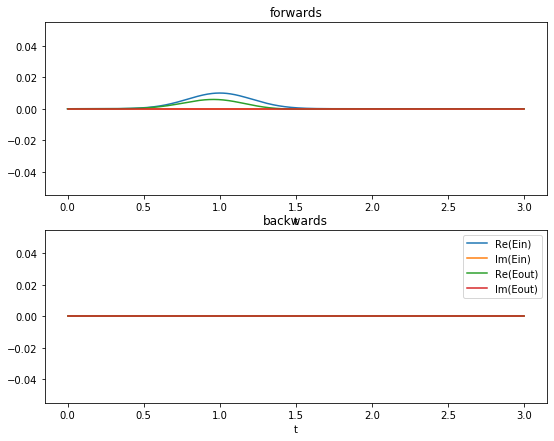

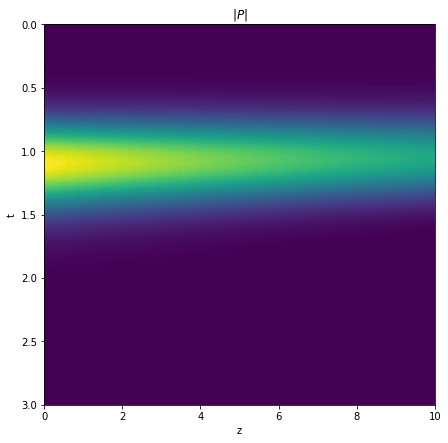

In [13]:
detAx =linspace(-1,1,100)
simObj=mb.MBE_1D_SVEA(detAx=detAx, cavityParams={}, length_in_lambdas=10, pts_per_lambda=7)
p=simObj.params
t=linspace(0,3,1000)
EinFw=.01*MT.gauss(t, [1,1,0.5]) + 0j
EinRv = EinFw*0
simObj.setInputs(EinFw=EinFw, EinRv=EinRv, tAx=t)
#simObj.setInitialConditions(P0=0, w0=-1, pop0=1)
pop0 = [1.0, 0]
simObj.setInitialState(pop0=pop0)
lineF=lambda delt: 10.0
simObj.setAtomParams(lineShape=lineF,  gsEnergies=[0], 
                     esEnergies=[0], T1_opt=.2/pi)#0.003);
%time outA, s=simObj.calculate(linspace(0,3.0,500))

#display(abs(simObj.res.fields.EoutFw).mean() )
mb.showInputsOutputs(simObj.res.fields)
mb.showMeanPol(simObj.res)

In [9]:
simObj.res.popT.shape

(500, 3, 70, 100)

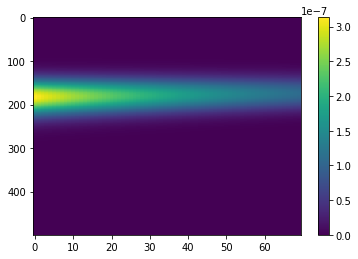

In [6]:
imshow(outA[:,1,:,detAx.size//2].real, aspect='auto')
colorbar()

C:\Users\morgan\Anaconda3\envs\pymbe\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


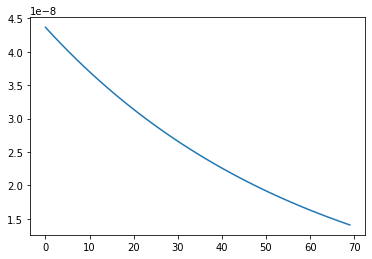

In [96]:
plot(outA[:,1,:,detAx.size//2].mean(axis=0))


C:\Users\morgan\Anaconda3\envs\pymbe\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


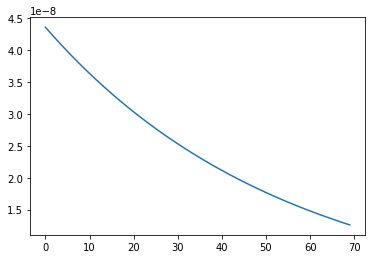

In [93]:
plot(outA[:,1,:,detAx.size//2].mean(axis=0))


In [210]:
val = array(5.0)
complex(val)

(5+0j)

## Bloch but not Maxwell equations

In [23]:
import tensorflow as tf
detAx =linspace(-1, 1,1)
simObj=mb.MBE_1D_SVEA(detAx=0*detAx, cavityParams={}, length_in_lambdas=0, pts_per_lambda=0)
p=simObj.params
t=linspace(0,3,1000)
EinFw=20.0*MT.gauss(t, [1,1,0.2]) + 0j
EinRv = EinFw*0

EinFw = lambda t: 1/((t-1)**2 + 0.2)
simObj.setInputs(EinFw=EinFw, tAx=t)
pop0 = [1.0, 0.0]
simObj.setInitialState(pop0=pop0)
simObj.setAtomParams(lineShape = lambda det: 0.1, gsEnergies=[0], 
                     esEnergies=[0,], T1_opt=100/pi)#0.003);
tSteps=linspace(0,1,300)
%time outA =simObj.calculate(tSteps)
#simObj.setInputs(EinFw=EinFw, tAx=t)
#%timeit outA =simObj.calculate(tSteps, bDoPrecalc=False)

s=simObj.ode_s
#mb.showMeanPol(simObj.res)

Doing cavity mode calcs
setInitialState
Setting atom params
Munch({'tSym': t, 'dimSyms': [Delta], 'prop_state_syms': [\rho_{0|0}, \rho_{1|1}, \rho_{0|1}], 'stationary_state_syms': [], 'driving_syms': [Ef], 'state_dep_syms': [Delta]})
state dependent functions should have signature [t, Delta, \rho_{0|0}, \rho_{1|1}, \rho_{0|1}, Ef]


TypeError: unsupported operand type(s) for *: 'complex' and 'NoneType'

C:\Users\morgan\Anaconda3\envs\pymbe\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


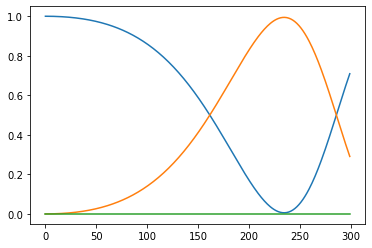

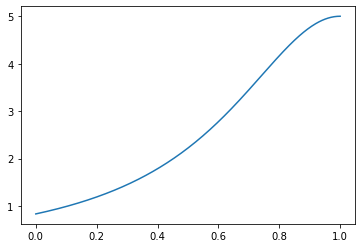

In [22]:
plot(outA.squeeze())
figure()
plot(tSteps, EinFw(tSteps))

C:\Users\morgan\Anaconda3\envs\pymbe\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


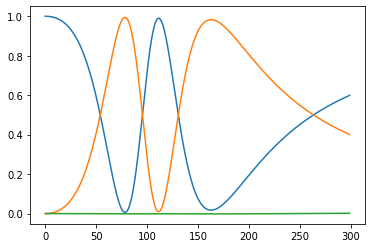

In [31]:
outA = outA.reshape(300,3,-1)
plot(outA[:,:,500])

In [158]:
plot(tSteps, outA[:,:,:,10].mean(axis=-1) ) 
plot(tSteps, outA[:,:,:,990].mean(axis=-1)  )
#ylim([-0.2,0.2])
grid()

IndexError: too many indices for array

ValueError: x and y can be no greater than 2-D, but have shapes (300,) and (300, 3, 1000)

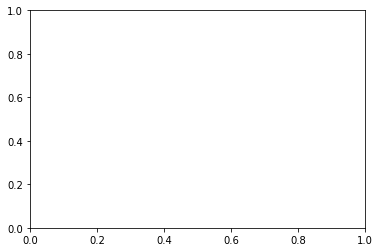

In [60]:
plot(tSteps, outA[:,:,10] ) 
plot(tSteps, outA[:,:,990] ) 
ylim([-0.2,0.2])
grid()

In [190]:
simObj.ode_s.dim_shape

(1000,)

In [39]:
s.dy_dtD

{rho00: 15.707963267949*rho11 + 1.0*I*(Ef*conjugate(rho01) - rho01*conjugate(Ef)),
 rho11: -15.707963267949*rho11 + 1.0*I*(-Ef*conjugate(rho01) + rho01*conjugate(Ef)),
 rho01: 1.0*I*Ef*(-rho00 + rho11) - 15.707963267949*rho01*(0.4*I*Delta + 0.5)}

In [22]:
{key:val.subs(E_exS, 0) for key,val in  s.dy_dtD.items()}

{rho00: 15.707963267949*rho11 + 1.0*I*(Ef*conjugate(rho01) - rho01*conjugate(Ef)),
 rho11: -15.707963267949*rho11 + 1.0*I*(-Ef*conjugate(rho01) + rho01*conjugate(Ef)),
 rho01: 1.0*I*Ef*(-rho00 + rho11) - 15.707963267949*rho01*(0.4*I*Delta + 0.5)}

In [18]:
E_exS=s.symsD['driving_syms'][0]

In [217]:
s=simObj.ode_s
f = s._d_dtF
import sympy as sm
f2= sm.lambdify(s.eq.lhs, s.eq.rhs, modules='tensorflow')

t = 0
shape = (300,300)
z=linspace(0,10,shape[0])[:, newaxis]# +0j
delta = linspace(-1,1,shape[1])[newaxis] +0j
rho00 = 0.5*ones(shape) + 0j
rho11 = 0.5*ones(shape) +0j
rho01 = zeros(shape) +0j


In [218]:
%timeit f(0.5,  delta, rho00, rho11, rho01, 1+0j)

1.79 ms ± 76.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [232]:
for t in arange(15):
    f(tf.Variable(t+0.5, dtype=tf.float64),  delta, rho00, rho11, rho01, tf.constant(t + 5j) )

In [225]:
tf.Variable(5, dtype=tf.complex128)

<tf.Variable 'Variable:0' shape=() dtype=complex128, numpy=(5+0j)>

In [113]:
import tensorflow as tf
f_tf =tf.function(f)

In [176]:
%timeit _=f(0.5, z, delta, rho00, rho11, rho01, 1,0.5)

TypeError: _lambdifygenerated() takes 6 positional arguments but 8 were given

In [139]:
@tf.function
def F(x,y):
    z=x + y*tf.math.conj(y)
    return z**2

F(ones(10, dtype='c16'), ones(10, dtype='c16') )

<tf.Tensor: shape=(10,), dtype=complex128, numpy=
array([4.+0.j, 4.+0.j, 4.+0.j, 4.+0.j, 4.+0.j, 4.+0.j, 4.+0.j, 4.+0.j,
       4.+0.j, 4.+0.j])>

In [138]:
tf.conj

AttributeError: module 'tensorflow' has no attribute 'conj'

In [125]:
s.eq

Munch({'lhs': [t, z, Delta, rho00, rho11, rho01, Ef, E_in], 'rhs': [0.0314159265358979*rho11 + 1.0*I*(-rho01*(conjugate(E_in) + conjugate(Ef)) + (E_in + Ef)*conjugate(rho01)), -0.0314159265358979*rho11 + 1.0*I*(rho01*(conjugate(E_in) + conjugate(Ef)) - (E_in + Ef)*conjugate(rho01)), -0.0314159265358979*rho01*(200.0*I*Delta + 0.5) + 1.0*I*(E_in + Ef)*(-rho00 + rho11)]})